**0. Import the data and declare your package dependencies.**

In [1]:
#libraries
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, theme, element_text, labs, facet_wrap, geom_histogram, geom_density, geom_bar


In [2]:
#data
avocado = pd.read_csv('data/avocado-updated-2020.csv')

**1. Briefly describe the data set. What information does it contain?**

In [3]:
# "The dataset features historical data on avocado prices and sales volume in multiple cities, states, and regions of the USA" 
# "Contains data from 4 January 2015 up to 17 May 2020"
# - Kaggle

**2. Clean the data in any way you see fit.**

In [4]:
#data manipulation
#long_avocado = avocado.melt(id_vars=["total_volume"], value_vars=["small_bags", "large_bags", "xlarge_bags"], 
                            #var_name="bag_type", value_name="bag_volume")


avocado_clean = avocado
# converts the string to date format
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])

#split date to 3 variables
avocado_clean['year'] = avocado_clean['date'].dt.year
avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day


**Exercises**

**3. Which major geographical region sold the most total organic, small Hass avocados in 2017?**


In [5]:
#select only the organic observations in the year 2017
organic = avocado_clean[(avocado["type"] == "organic") & (avocado_clean["year"] == 2017)]

#stores small_bags grouped by geography. gets the max and then sorts
#refrenced chat GPT
organic.groupby("geography")["small_bags"].max().sort_values(ascending=False)

#the northeast region is the most at 238752.11 small bags

geography
Total U.S.              771846.48
Northeast               238752.11
West                    160414.47
South Central           145920.93
Great Lakes             140923.52
Midsouth                131997.28
California              102260.68
Denver                   91421.75
Los Angeles              87365.60
Southeast                69576.29
New York                 60473.16
Baltimore/Washington     57494.13
Houston                  48107.57
Boston                   36442.28
Plains                   34485.91
Northern New England     32627.56
Dallas/Ft. Worth         31403.21
Philadelphia             30809.89
Detroit                  27997.42
Harrisburg/Scranton      25562.80
West Tex/New Mexico      25191.62
Seattle                  22511.93
Chicago                  22340.77
Hartford/Springfield     18475.42
Raleigh/Greensboro       15201.69
Buffalo/Rochester        14993.82
Pittsburgh               14761.11
Las Vegas                14188.24
Richmond/Norfolk         13577.23
Colu

**4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?**

In [6]:
#split the variables in the data cleaning step

#stores total_volume grouped by month. gets the max and then sorts
avocado_clean.groupby("month")["total_volume"].max().sort_values(ascending=False)

#month 5 is the highest average volume of avocado sales (6371644.15)

month
5     63716144.15
2     63428864.75
7     55608056.70
6     55007945.00
4     52015534.19
8     51973374.00
3     51540125.03
9     51000908.97
1     48534972.05
10    46520087.91
11    45167049.45
12    39683131.73
Name: total_volume, dtype: float64

**5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.**

In [7]:
#stores total_volume grouped by geography. gets the max and then sorts
avocado_clean.groupby("geography")["total_volume"].max().sort_values(ascending=False)

#California sold the most total avocados (63716144.15)

geography
Total U.S.              63716144.15
California              11324682.73
West                    11274749.11
South Central           10323174.59
Northeast                9254874.00
Southeast                7902525.57
Great Lakes              7094764.73
Midsouth                 6469663.94
Los Angeles              5660216.21
Plains                   3844221.17
New York                 3671266.93
Houston                  2381742.59
Phoenix/Tucson           2200550.27
Dallas/Ft. Worth         2165376.03
Chicago                  2025925.36
San Francisco            1706251.05
West Tex/New Mexico      1637554.42
Baltimore/Washington     1548164.82
Miami/Ft. Lauderdale     1515888.74
Denver                   1492248.70
Boston                   1306611.00
Portland                 1189151.17
Atlanta                  1132758.55
San Diego                1100167.10
Seattle                  1093144.23
Northern New England     1089324.00
Philadelphia              948980.00
Detroit           

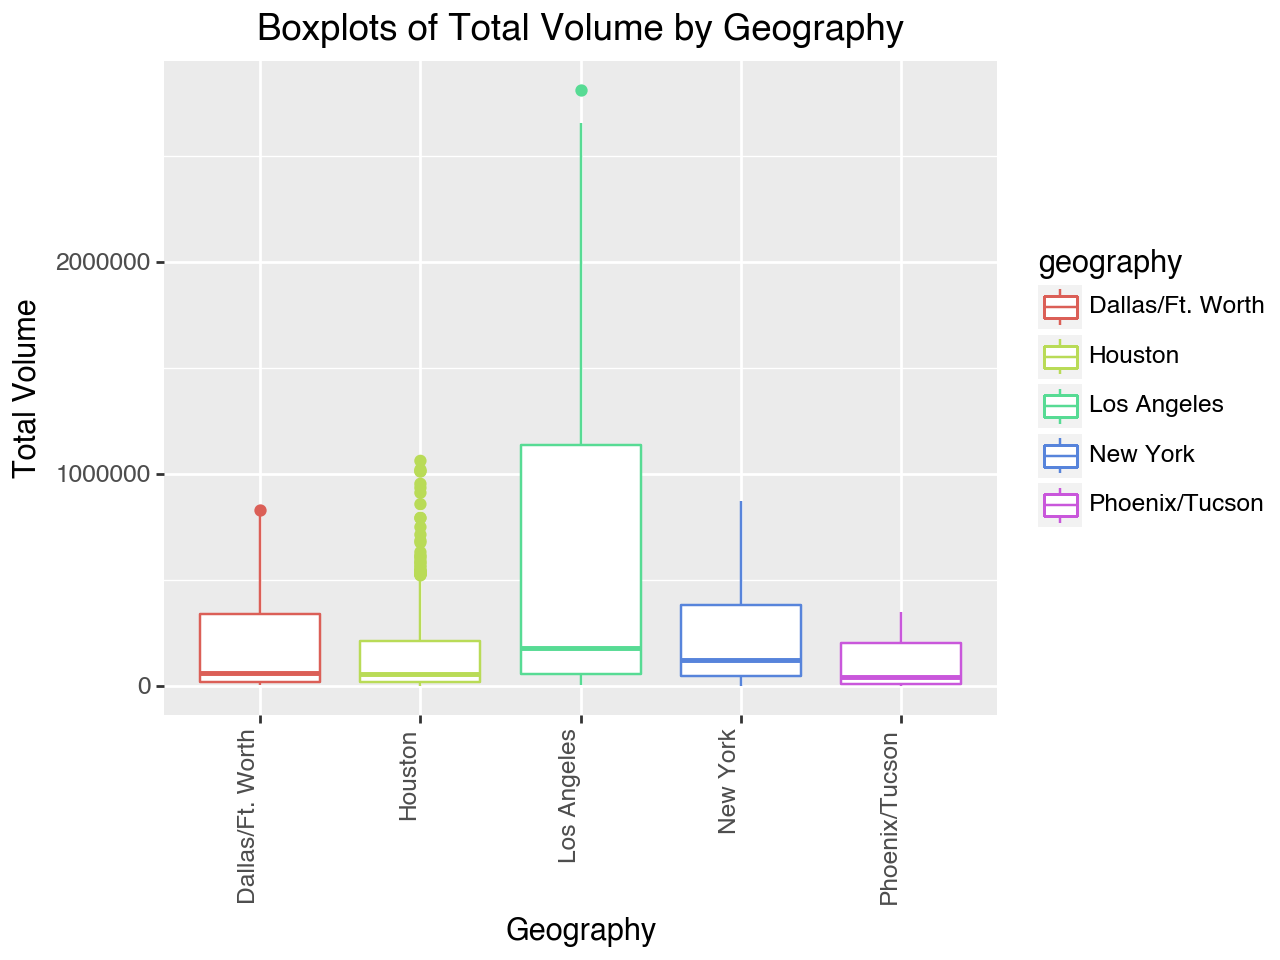

In [8]:
#top 5 metro geographical regions:
# los angeles
# new york
# houston
# pheonix 
# dallas
#filter data to only include those 5 regions
top_5 = avocado_clean[(avocado["geography"] == "Los Angeles") | (avocado_clean["geography"] == "New York") | (avocado_clean["geography"] == "Houston") | (avocado_clean["geography"] == "Phoenix/Tucson") | (avocado_clean["geography"] == "Dallas/Ft. Worth")]

#side-by-side box plot
(ggplot(top_5, aes(x='geography', y='small_bags', color = 'geography'))
    + geom_boxplot()
    + theme(axis_text_x=element_text(angle=90, hjust=1))
    + labs(title='Boxplots of Total Volume by Geography', x='Geography', y='Total Volume')
)

**Pivoting**

**6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.**

In [9]:
california = avocado_clean[(avocado["geography"] == "Los Angeles") | (avocado_clean["geography"] == "San Diego") | (avocado_clean["geography"] == "Sacramento") | (avocado_clean["geography"] == "San Francisco")]


**7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.**

In [10]:
#see which region the price of organic versus conventional is most different
california.groupby(["type", "geography"])["average_price"].max().sort_values(ascending=False)

#average price difference between organic and convertional per region:

#san francisco: $1.05 more for organic
#sacramento: $0.93 more for organic
#san diego: $0.95 more for organic
#los angeles: $0.64 more for organic

type          geography    
organic       San Francisco    3.25
              Sacramento       2.82
              San Diego        2.78
              Los Angeles      2.44
conventional  San Francisco    2.20
              Sacramento       1.89
              San Diego        1.83
              Los Angeles      1.80
Name: average_price, dtype: float64

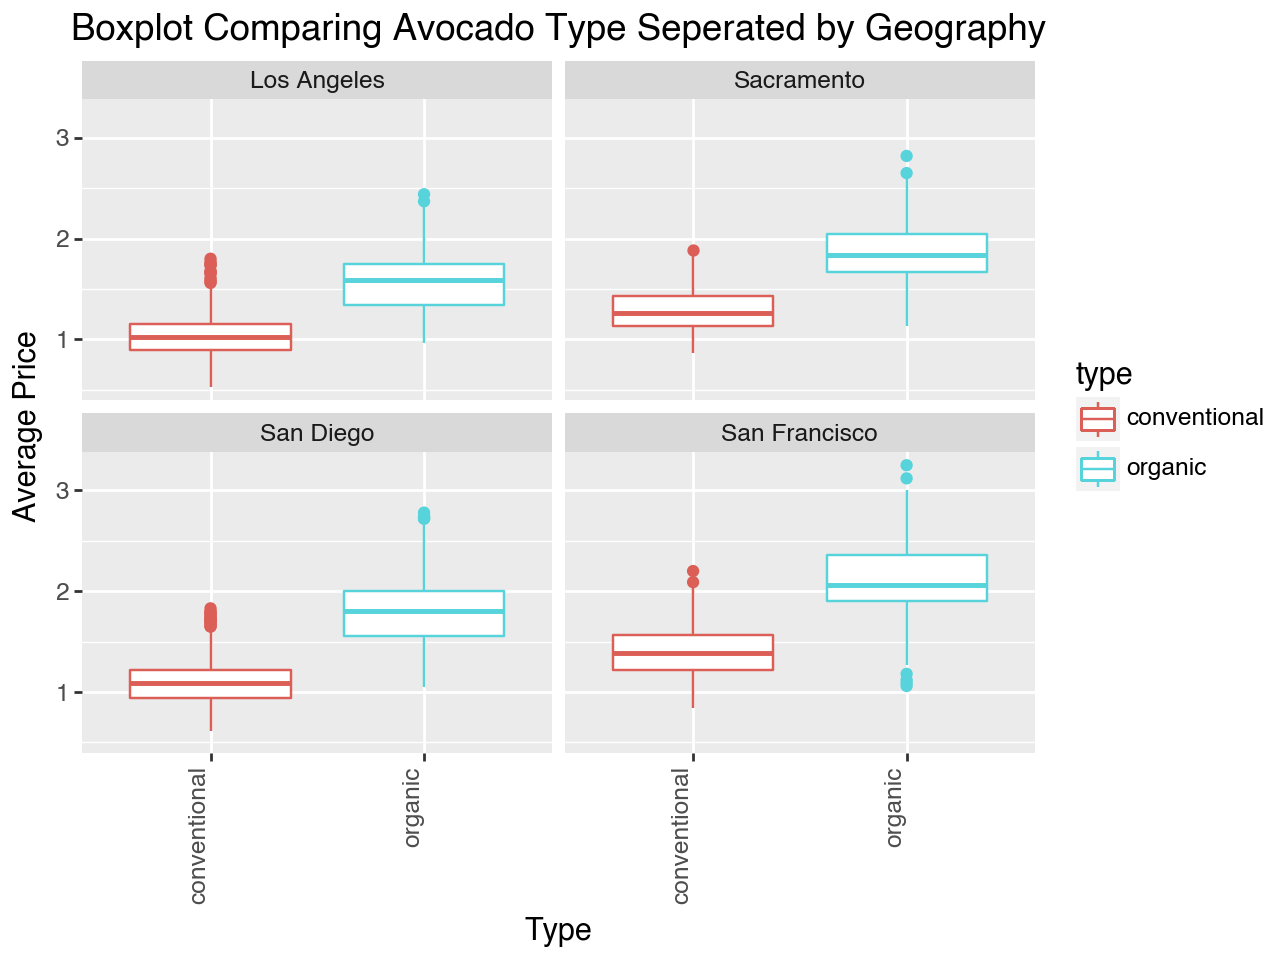

In [11]:
#boxplot using facet_wrap for region
(ggplot(california, aes(x='type', y='average_price', color = 'type'))
    + geom_boxplot()
    + facet_wrap('geography')
    + theme(axis_text_x=element_text(angle=90, hjust=1))
    + labs(title='Boxplot Comparing Avocado Type Seperated by Geography', x='Type', y='Average Price')
)

**8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.**

![image info](plots/plot1.png)

In [20]:
#pivot data so that it shows value and then type?
long_california = california.melt(id_vars=["date", "average_price", "total_volume", "geography", "type"], value_vars=["small_bags", "large_bags", "xlarge_bags"], 
                            var_name="bag_type", value_name="bag_value")


#changes all the variables below to categorical variable type.
long_california['bag_type'] = long_california['bag_type'].astype('category')
long_california['geography'] = long_california['geography'].astype('category')
long_california['type'] = long_california['type'].astype('category')




In [35]:
# Step 1: Reshape the data using `pivot_table` to sum values for each `geography` and `type`
#bag_counts = california.groupby(['geography', 'type', 'average_price'])[['small_bags', 'large_bags', 'xlarge_bags']].sum().reset_index()

# Step 2: Melt the grouped data to long format
long_california = california.melt(id_vars=['geography', 'type', 'average_price'], value_vars=['small_bags', 'large_bags', 'xlarge_bags'],
                                  var_name='bag_type', value_name='bag_value')

# Step 3: Calculate the total bag value per region to get proportions
long_california['total_bag_value'] = long_california.groupby(['geography', 'type'])['bag_value'].transform('sum')

# Step 4: Calculate the proportion of each bag type within each region
long_california['proportion'] = long_california['average_price'] / long_california['total_bag_value']

In [14]:
#plot design:

#plot type = barplot
#x = region
#y = proportion by average hass avocado sales
#facet_wrap = avocado type


In [38]:
from plotnine import ggplot, aes, geom_bar, facet_wrap, theme, element_text, labs

(ggplot(long_california, aes(x='geography', y = 'proportion', fill='bag_type'))
    + geom_bar(position='fill')  # Use 'fill' to show proportions
    + facet_wrap('type')
    + theme(axis_text_x=element_text(angle=45, hjust=1))  # Adjust the angle for better readability
    + labs(title='Proportion of Avocado Sales by Bag Type and Geography', x='Region of California', y='Proportion')
)

#must be doing something in the data pivoting step wrong b/c it says that all the categories are equal currently


PlotnineError: 'stat_bin() must not be used with a y aesthetic.'